# `pandas` 学习簿

`pandas` 是 `Python` 数据科学与数据分析领域无可替代的核心库，说它奠定了`Python`在结构化数据处理领域的生态基石，毫不夸张。
`pandas` 这个名字，是 **Panel Data**（经济学中常用的多维面板数据）与 **Python Data Analysis** 两个概念的融合（这种结合领域特性与工具定位的命名方式，也让它在众多 Python 库中极具辨识度）。它构建在 `numpy` 强大的数组计算基础之上，提供了更贴合实际业务场景的结构化数据处理能力，核心是 `Series`（一维标记数据）与 `DataFrame`（二维表格数据）这两个灵活高效的数据结构，成为处理海量结构化数据的 “标配容器”。

`pandas`是开源软件包，它的开发始于 2008 年，由美国量化分析师 _Wes McKinney_ 发起 —— 当时他在对冲基金 AQR Capital Management 处理金融数据时，发现现有 Python 工具（包括`numpy`）在结构化表格数据的标签索引、缺失值处理等场景下存在明显不足，无法满足金融分析的高效性与灵活性需求。于是，Wes 基于实际业务痛点，着手开发一款专门面向结构化数据的处理库，而这正是`pandas`的雏形。

值得一提的是，`pandas` 从诞生起就与 `Python` 生态深度绑定 —— 它依赖 `numpy` 实现底层计算，同时为 `matplotlib`（可视化）、`scikit-learn`（机器学习）、`statsmodels`（统计分析）等库提供数据输入支持，形成了 “数据处理 - 分析 - 可视化 - 建模” 的完整工作流。

下面是`pandas`的主要功能及特点：
* 核心数据结构：`Series`（一维带标签数组，支持多数据类型，索引是其核心标识）与 `DataFrame`（二维表格结构，可存储不同类型列数据，通过行索引与列名双重定位，适配绝大多数业务数据场景）；
全场景数据读写：支持 CSV、Excel、JSON、HTML、数据库（MySQL、SQLite 等）、HDF5、Parquet 等几乎所有主流数据格式，无需手动编写解析逻辑，一键实现数据导入导出；
高效数据清洗：内置缺失值处理、重复值删除、数据类型转换、异常值识别等功能，快速解决 **“脏数据”** 问题；
* 灵活索引与筛选：提供标签索引、位置索引、布尔索引等多种方式，支持单条件、多条件组合筛选，轻松定位目标数据；
* 强大分组聚合：通过`groupby()`实现按单列 / 多列分组，结合`sum()/mean()`等内置函数计算统计指标；
* 生态无缝集成：作为数据 “中间枢纽”，可直接与`numpy`（数组计算）、`matplotlib/seaborn`（可视化）、`scikit-learn`（机器学习预处理）对接，无需频繁转换数据格式；
* 高性能处理能力：底层基于`numpy`且核心算法用 C 语言实现，处理百万级、千万级数据的速度远超纯`Python`循环，满足大规模数据处理需求。
这份工作簿将带你快速入门`pandas`，掌握其核心数据结构与常用操作。而`pandas`的高级特性（如多层索引、自定义函数优化、大数据分块处理等），则需要你在实际业务场景中进一步探索 —— 而这里，只是你结构化数据处理之旅的起点🕖。

⚠ 注意：本工作簿假定你已掌握 Python 基础语法，且对 numpy 有初步了解（如数组概念、基本运算）。若你是 Python 初学者，建议先通过 [Python基础教程](https://slp.shuishan.net.cn/book/9Wd2sIcOOh6) 掌握变量、列表、字典等基础概念；若对 numpy 不熟悉，也可先学习[numpy入门知识](../workbooks/numpy.ipynb)，为 pandas 学习打下更扎实的基础。

## 准备工作

你可以通过 `pip` 来安装 `pandas`：
```bash
pip install pandas
```
安装成功后，就可以在你的程序中引入 `pandas` 库(导入`pandas`一般使用别名`pd`代替)：

In [1]:
import pandas as pd

可以通过一个简单的实例来验证pandas是否安装成功：

In [2]:
# 创建一个简单的 DataFrame
data = {'Name': ['Data', 'Power', 'Science'], 'ID': [1, 2, 3]}
df = pd.DataFrame(data)

# 查看 DataFrame
print(df)

      Name  ID
0     Data   1
1    Power   2
2  Science   3


在`pandas`中，我们先来了解两个重要的结构——`Series`和`DataFrame`

## Series

`Series` 是`pandas`的核心结构之一，可以把它看作带标签的一维数组。
它类似于 字典 + 数组 的结合：既有数据值，又有索引。
同时，它可以存储任何数据类型（整数、浮点数、字符串、对象、Python 列表等）。

### 创建Series

可以从列表或者数组中创建

In [3]:
import pandas as pd

s = pd.Series([10, 20, 30, 40])
print(s)

0    10
1    20
2    30
3    40
dtype: int64


也可以通过自定义索引创建

In [4]:
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s1)

a    10
b    20
c    30
dtype: int64


还可以通过字典创建。前两种方式，都是只传递了数据，那么索引是默认索引（0 ~ N-1，没错，索引值是从0开始的）；下面的字典创建方式，则是以字典的键为索引，字典的值为数据。

In [5]:
data = {'a': 100, 'b': 200, 'c': 300}
s2 = pd.Series(data)
print(s2)

a    100
b    200
c    300
dtype: int64


![img](assets/seires.png)

当然，最完整的创建方式可以看下面的参数设置

```bash
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

```

* **data**：`Series`的数据部分，可以是列表、数组、字典、标量值等。如果不提供此参数，则创建一个空的 Series。
* **index**：`Series` 的索引部分，用于对数据进行标记。可以是列表、数组、索引对象等。如果不提供此参数，则创建一个默认的整数索引。
* **dtype**：指定`Series`的数据类型。可以是`numpy`的数据类型，例如`np.int64`、`np.float64`等。如果不提供此参数，则根据数据自动推断数据类型。
* **name**：`Series` 的名称，用于标识`Series`对象。如果提供了此参数，则创建的`Series`对象将具有指定的名称。
* **copy**：是否复制数据。默认为`False`，表示不复制数据。如果设置为`True`，则复制输入的数据。
* **fastpath**：是否启用快速路径。默认为`False`。启用快速路径可能会在某些情况下提高性能。


## 索引

从上述有关`seires`的创建中可以发现，**series的索引不是固定的，是可以修改的**。

### 按标签索引（类似字典）

In [6]:
import pandas as pd
s3 = pd.Series([10, 20, 30, 40], index=['a','b','c','d'])

print(s3)

a    10
b    20
c    30
d    40
dtype: int64


In [7]:
print(s3['a'])       # 单个标签 → 10
print(s3[['a','c']]) # 多个标签 → 返回新的 Series

10
a    10
c    30
dtype: int64


### 按位置索引（类似列表/数组）

In [8]:
print(s3[0])     # 第1个元素 → 10
print(s3[2])     # 第3个元素 → 30
print(s3[[0, 2]]) # 多个位置 → [10, 30]

10
30
a    10
c    30
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21304\2201123397.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s3[0])     # 第1个元素 → 10
C:\Users\DELL\AppData\Local\Temp\ipykernel_21304\2201123397.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s3[2])     # 第3个元素 → 30
C:\Users\DELL\AppData\Local\Temp\ipykernel_21304\2201123397.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s3[[0, 2]]) # 多个位置 → [10, 30]


### 推荐写法：`.loc[]`和`.iloc[]`

* `loc` → 按标签寻找
* `iloc` → 按位置寻找


In [9]:
print(s3.loc['b'])      # 标签 → 20
print(s3.iloc[1])       # 位置 → 20

20
20


## 切片

切片操作是获取新的seires对象的操作。

### 按位置切片

和python列表一致，左闭右开


In [10]:
print(s3[1:3])  # b, c → 20, 30

b    20
c    30
dtype: int64


### 按标签切片
左闭右闭，和`按位置切片`不同

In [11]:
print(s3['b':'d'])
# 输出 b,c,d → 20, 30, 40

b    20
c    30
d    40
dtype: int64


关于开闭区间，可以简单总结如下：
* **位置切片**: `[start:stop]` → 不包含stop
* **标签切片**: `[start:stop]` → 包含stop

### 布尔索引（条件筛选）

In [12]:
print(s3[s3 > 20])   # c=30, d=40
print(s3[(s3 >= 20) & (s3 <= 30)])  # b=20, c=30

c    30
d    40
dtype: int64
b    20
c    30
dtype: int64


同时，索引不仅仅能提取数据，还能修改数据

In [13]:
# 先打印原有series
print(s3)

a    10
b    20
c    30
d    40
dtype: int64


In [14]:
# 修改series的内容，之后对比差距
s3['a'] = 100
s3.iloc[1] = 200
print(s3)

a    100
b    200
c     30
d     40
dtype: int64


## Series的常用方法

| 方法名称        | 功能描述 | 示例代码 |
|-----------------|----------|----------|
| `index`         | 获取 Series 的索引 | `s.index` |
| `values`        | 获取 Series 的数据部分（返回 NumPy 数组） | `s.values` |
| `head(n)`       | 返回 Series 的前 n 行（默认为 5） | `s.head(3)` |
| `tail(n)`       | 返回 Series 的后 n 行（默认为 5） | `s.tail(2)` |
| `dtype`         | 返回 Series 中数据的类型 | `s.dtype` |
| `shape`         | 返回 Series 的形状（行数） | `s.shape` |
| `describe()`    | 返回 Series 的统计描述（如均值、标准差、最小值等） | `s.describe()` |
| `isnull()`      | 返回一个布尔 Series，表示每个元素是否为 NaN | `s.isnull()` |
| `notnull()`     | 返回一个布尔 Series，表示每个元素是否不是 NaN | `s.notnull()` |
| `unique()`      | 返回 Series 中的唯一值（去重） | `s.unique()` |
| `value_counts()`| 返回 Series 中每个唯一值的出现次数 | `s.value_counts()` |
| `map(func)`     | 将指定函数应用于 Series 中的每个元素 | `s.map(lambda x: x*2)` |
| `apply(func)`   | 将指定函数应用于 Series 中的每个元素，常用于自定义操作 | `s.apply(str)` |
| `astype(dtype)` | 将 Series 转换为指定的类型 | `s.astype(float)` |
| `sort_values()` | 对 Series 中的元素进行排序（按值排序） | `s.sort_values()` |
| `sort_index()`  | 对 Series 的索引进行排序 | `s.sort_index()` |
| `dropna()`      | 删除 Series 中的缺失值（NaN） | `s.dropna()` |
| `fillna(value)` | 填充 Series 中的缺失值（NaN） | `s.fillna(0)` |
| `replace(to_replace, value)` | 替换 Series 中指定的值 | `s.replace(1, 100)` |
| `cumsum()`      | 返回 Series 的累计求和 | `s.cumsum()` |
| `cumprod()`     | 返回 Series 的累计乘积 | `s.cumprod()` |
| `shift(periods)`| 将 Series 中的元素按指定的步数进行位移 | `s.shift(1)` |
| `rank()`        | 返回 Series 中元素的排名 | `s.rank()` |
| `corr(other)`   | 计算 Series 与另一个 Series 的相关性（皮尔逊相关系数） | `s.corr(s2)` |
| `cov(other)`    | 计算 Series 与另一个 Series 的协方差 | `s.cov(s2)` |
| `to_list()`     | 将 Series 转换为 Python 列表 | `s.to_list()` |
| `to_frame()`    | 将 Series 转换为 DataFrame | `s.to_frame()` |
| `iloc[]`        | 通过位置索引来选择数据 | `s.iloc[0:2]` |
| `loc[]`         | 通过标签索引来选择数据 | `s.loc['a':'c']` |


可以自行试验一下上述的方法

## DataFrame

* **DataFrame 是一个二维表格型数据结构**，既有 **行索引（index）**，也有 **列索引（columns）**。
* 每一列是一个 **Series**，但不同列可以是 **不同数据类型**（整数、浮点数、字符串等）。


### 创建DataFrame

可以从字典中创建

In [15]:
import pandas as pd

data1 = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85.5, 92.0, 78.0]
}

df = pd.DataFrame(data1)
print(df)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


也可以从列表创建

In [16]:
data2 = [
    ['Alice', 25, 85.5],
    ['Bob', 30, 92.0],
    ['Charlie', 35, 78.0]
]

df1 = pd.DataFrame(data2, columns=['Name','Age','Score'])
print(df1)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0


当然，其实也可以从`series`中创建

In [17]:
df2 = pd.DataFrame({
    'Age': pd.Series([25,30,35], index=['a','b','c']),
    'Score': pd.Series([85,90,95], index=['a','b','c'])
})
print(df2)

   Age  Score
a   25     85
b   30     90
c   35     95


## DataFrame的属性

我们有的时候需要获取`DataFrame`的属性数据，常见的有以下：

In [ ]:
print(df.shape)     # 形状
print(df.columns)   # 列名
print(df.index)     # 索引
print(df.head())    # 前几行数据，默认是前 5 行
print(df.tail())    # 后几行数据，默认是后 5 行
print(df.info())    # 数据信息
print(df.describe())# 描述统计信息
print(df2.mean())    # 求平均值
print(df.sum())     # 求和


(3, 3)
Index(['Name', 'Age', 'Score'], dtype='object')
RangeIndex(start=0, stop=3, step=1)
      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0
      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   92.0
2  Charlie   35   78.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      int64  
 2   Score   3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes
None
        Age      Score
count   3.0   3.000000
mean   30.0  85.166667
std     5.0   7.005950
min    25.0  78.000000
25%    27.5  81.750000
50%    30.0  85.500000
75%    32.5  88.750000
max    35.0  92.000000
Age      30.0
Score    90.0
dtype: float64
Name     AliceBobCharlie
Age                   90
Score              255.5
dtype: object


## DataFrame的基本操作

In [ ]:
import pandas as pd
import numpy as np

data3 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Amy', 'Jack'],
    'Age': [25, 30, 35, np.nan, 30],   # 插入空值
    'Score': [85.5, 92.0, 78.0, np.nan, 99.0]  # 这里也加了一个空值
}

df3 = pd.DataFrame(data3)
print(df3)


      Name   Age  Score
0    Alice  25.0   85.5
1      Bob  30.0   92.0
2  Charlie  35.0   78.0
3      Amy   NaN    NaN
4     Jack  30.0   99.0


### 选取列

In [ ]:
df3['Age']          # 返回 Series

0    25.0
1    30.0
2    35.0
3     NaN
4    30.0
Name: Age, dtype: float64

In [ ]:
df3[['Age','Score']]  # 返回 DataFrame

,Age,Score
0,25.0,85.5
1,30.0,92.0
2,35.0,78.0
3,NaN,NaN
4,30.0,99.0


### 选取行

In [ ]:
df3.iloc[0]        # 按位置，返回 Series

Name     Alice
Age         25
Score     85.5
Name: 0, dtype: object

In [ ]:
df3.loc[0]         # 按标签，返回 Series

Name     Alice
Age         25
Score     85.5
Name: 0, dtype: object

In [ ]:
df3[0:2]           # 切片，返回 DataFrame

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0


### 条件筛选

In [ ]:
df3[df3['Score'] > 90] # 筛选分数大于90分的数据

,Name,Age,Score
1,Bob,30.0,92.0
4,Jack,30.0,99.0


In [ ]:
df3[(df3['Age'] >= 30) & (df3['Score'] > 80)] #筛选年龄大于30且分数大于80的数据

,Name,Age,Score
1,Bob,30.0,92.0
4,Jack,30.0,99.0


### 缺失值处理

In [ ]:
df3.isnull()        # 判断缺失值

,Name,Age,Score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


In [ ]:
df3.dropna()        # 删除缺失行

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
4,Jack,30.0,99.0


In [ ]:
df3.fillna(0)       # 填充缺失值(用0填充)

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,0.0,0.0
4,Jack,30.0,99.0


### 排序

In [ ]:
df3.sort_values('Score', ascending=False)  # 按值排序

,Name,Age,Score
4,Jack,30.0,99.0
1,Bob,30.0,92.0
0,Alice,25.0,85.5
2,Charlie,35.0,78.0
3,Amy,NaN,NaN


In [ ]:
df3.sort_index()                           # 按行索引排序

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,NaN,NaN
4,Jack,30.0,99.0


### 分组聚合

先按Age分组(即age相同的聚为一类)，然后选择了 Score 这一列，再去计算均值

In [ ]:
df3.groupby('Age')['Score'].mean()

Age
25.0    85.5
30.0    95.5
35.0    78.0
Name: Score, dtype: float64

In [ ]:
df3.groupby('Age').agg({'Score':'mean'})

,Score
Age,
25.0,85.5
30.0,95.5
35.0,78.0


虽然两个聚合结果是一样的，但其实内在的逻辑是不同的。第一种方法只能对**单列**进行聚合，返回的是**Series**；而第二种方法可以进行多列、多函数的聚合，返回的是**DataFrame**。

### 添加和删除列

In [ ]:
df3['Passed'] = df3['Score'] > 85   # 新增列
df3

,Name,Age,Score,Passed
0,Alice,25.0,85.5,True
1,Bob,30.0,92.0,True
2,Charlie,35.0,78.0,False
3,Amy,NaN,NaN,False
4,Jack,30.0,99.0,True


In [ ]:
df3.drop('Passed', axis=1, inplace=True)  # 删除列
df3

,Name,Age,Score
0,Alice,25.0,85.5
1,Bob,30.0,92.0
2,Charlie,35.0,78.0
3,Amy,NaN,NaN
4,Jack,30.0,99.0


## DataFrame的常用方法

| 方法名称           | 功能描述 | 示例代码 |
|------------------|----------|----------|
| `head(n)`         | 返回 DataFrame 的前 n 行数据（默认前 5 行） | `df.head(3)` |
| `tail(n)`         | 返回 DataFrame 的后 n 行数据（默认后 5 行） | `df.tail(2)` |
| `info()`          | 显示 DataFrame 的简要信息，包括列名、数据类型、非空值数量等 | `df.info()` |
| `describe()`      | 返回 DataFrame 数值列的统计信息，如均值、标准差、最小值等 | `df.describe()` |
| `shape`           | 返回 DataFrame 的行数和列数（行数, 列数） | `df.shape` |
| `columns`         | 返回 DataFrame 的所有列名 | `df.columns` |
| `index`           | 返回 DataFrame 的行索引 | `df.index` |
| `dtypes`          | 返回每一列的数据类型 | `df.dtypes` |
| `sort_values(by)` | 按指定列排序 | `df.sort_values('Score')` |
| `sort_index()`    | 按行索引排序 | `df.sort_index()` |
| `dropna()`        | 删除含有缺失值（NaN）的行或列 | `df.dropna()` |
| `fillna(value)`   | 用指定的值填充缺失值 | `df.fillna(0)` |
| `isnull()`        | 判断缺失值，返回布尔值 DataFrame | `df.isnull()` |
| `notnull()`       | 判断非缺失值，返回布尔值 DataFrame | `df.notnull()` |
| `loc[]`           | 按标签索引选择数据 | `df.loc[0:2, ['Name','Score']]` |
| `iloc[]`          | 按位置索引选择数据 | `df.iloc[0:2, 0:2]` |
| `at[]`            | 访问单个元素（比 loc[] 更高效） | `df.at[0,'Name']` |
| `iat[]`           | 访问单个元素（比 iloc[] 更高效） | `df.iat[0,1]` |
| `apply(func)`     | 对 DataFrame 或 Series 应用函数 | `df['Score'].apply(lambda x: x+5)` |
| `applymap(func)`  | 对 DataFrame 每个元素应用函数 | `df.applymap(lambda x: x*2 if isinstance(x,int) else x)` |
| `groupby(by)`     | 分组操作，按列汇总统计 | `df.groupby('Age')['Score'].mean()` |
| `pivot_table()`   | 创建透视表 | `df.pivot_table(index='Age', values='Score', aggfunc='mean')` |
| `merge()`         | 合并多个 DataFrame（SQL JOIN） | `pd.merge(df1, df2, on='ID')` |
| `concat()`        | 按行或列连接多个 DataFrame | `pd.concat([df1, df2], axis=0)` |
| `to_csv()`        | 导出 CSV 文件 | `df.to_csv('output.csv', index=False)` |
| `to_excel()`      | 导出 Excel 文件 | `df.to_excel('output.xlsx', index=False)` |
| `to_json()`       | 导出 JSON 格式 | `df.to_json('output.json')` |
| `to_sql()`        | 导出到 SQL 数据库 | `df.to_sql('table_name', con=conn, if_exists='replace')` |
| `query()`         | SQL 风格查询 | `df.query('Score > 80')` |
| `duplicated()`    | 返回布尔值 DataFrame，指示每行是否重复 | `df.duplicated()` |
| `drop_duplicates()` | 删除重复行 | `df.drop_duplicates()` |
| `set_index()`     | 设置 DataFrame 的索引 | `df.set_index('Name', inplace=True)` |
| `reset_index()`   | 重置索引 | `df.reset_index(drop=True, inplace=True)` |
| `transpose()`     | 转置 DataFrame（行列交换） | `df.transpose()` |


以上方法可以自行尝试，此处不多加赘述

## 从文件中读取数据

在数据分析的工作中，我们经常需要把外部文件的数据加载到 `pandas` 中进行处理。无论是最常见的 **CSV 文件**，还是日常办公中大量使用的 **Excel 文件**，又或者是 Web 开发和接口数据中常见的 **JSON 格式**，`pandas` 都提供了便捷的读取方法。下面我们就分别介绍如何使用函数将这些文件加载为`DataFrame`，便于后续的数据清洗和分析。

### Pandas读取CSV文件

**CSV**文件（逗号分隔值文件）是一种简单的纯文本文件格式，用于存储表格数据，其特点是使用逗号作为字段分隔符，每行表示一条记录。Pandas可以很方便的处理csv文件，常见的方法有```pd.read_csv()```和```DataFrame.to_csv()```两种方法来读取/写入CSV文档。

In [ ]:
import pandas as pd

# 读取 CSV 文件
df4 = pd.read_csv("assets/nba.csv")

print(df4.head())


            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


当然，也可以选择只读取部分的文件，常见参数有：

* `sep`：分隔符（默认`,`，可改为`\t`、`;`等）
* `encoding`：文件编码（常见 `'utf-8'`, `'gbk'`）
* `header`：指定哪一行作为列名，默认第 0 行
* `names`：自定义列名
* `usecols`：选择部分列读取
* `nrows`：仅读取前几行

In [ ]:
# 使用不同参数读取
df5 = pd.read_csv("assets/nba.csv", encoding="utf-8", usecols=["Name", "Age"], nrows=5)
print(df5.head())


            Name   Age
0  Avery Bradley  25.0
1    Jae Crowder  25.0
2   John Holland  27.0
3    R.J. Hunter  22.0
4  Jonas Jerebko  29.0


## Pandas读取Excel文件

Pandas 提供了丰富的 Excel 文件操作功能，帮助我们方便地读取和写入 .xls 和 .xlsx 文件，支持多表单、索引、列选择等复杂操作，是数据分析中必备的工具。

⚠️ 注意：读取 Excel 需要依赖库（如 `openpyxl` 或 `xlrd`），没安装的话要先安装：

```bash
pip install openpyxl
```

In [ ]:
import pandas as pd

df6 = pd.read_excel('assets/data.xlsx')

print(df6)

同样，读取Excel文件也可以自行选择参数。常用参数有：

* `sheet_name`：指定工作表，默认第一个，可以用名字或索引
* `usecols`：选择部分列
* `skiprows`：跳过前几行
* `nrows`：读取前几行

## Pandas读取Json文件

JSON(JavaScript Object Notation) 是一种轻量级的数据交换格式。 易于人阅读和编写。同时也易于机器解析和生成。 它基于JavaScript Programming Language, Standard ECMA-262 3rd Edition - December 1999的一个子集。 JSON采用完全独立于语言的文本格式，但是也使用了类似于C语言家族的习惯（包括C, C++, C#, Java, JavaScript, Perl, Python等）。 这些特性使JSON成为理想的数据交换语言。

In [ ]:
import json
import pandas as pd

with open("assets/website.json", "r", encoding="utf-8") as f:
    data4 = json.load(f)  # data 是一个 list of dicts

df7 = pd.DataFrame(data4)  # pandas 可以直接把 list of dicts 转为 DataFrame
print(df7)


     id  likes    name             url
0  A001     61      百度   www.baidu.com
1  A002    124  Google  www.google.com
2  A003     45      淘宝  www.taobao.com


## 利用Pandas进行数据清洗

在真实的使用场景中，数据常常是**不干净**的，往往存在缺失值、重复值、异常值，或者一些特殊的情况，这些dirty的数据都会对后续的数据分析等环节造成比较大的影响。所以**数据清洗**是分析前必不可少的一步，而Pandas提供了丰富的方法帮助我们快速处理这些问题。

### 查看数据概况

In [ ]:
import pandas as pd

df8 = pd.read_csv("assets/process-data.csv")

print("\n 查看前几行数据")
print(df8.head())

print("\n 查看基本信息：列名、数据类型、非空数量")
print(df8.info())

print("\n 查看数值列的统计信息")
print(df8.describe())



 查看前几行数据
           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
2  100003000.0     NaN  LEXINGTON            N          NaN        1   850
3  100004000.0   201.0   BERKELEY           12            1      NaN   700
4          NaN   203.0   BERKELEY            Y            3        2  1600

 查看基本信息：列名、数据类型、非空数量
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
PID             9 non-null float64
ST_NUM          7 non-null float64
ST_NAME         10 non-null object
OWN_OCCUPIED    9 non-null object
NUM_BEDROOMS    7 non-null object
NUM_BATH        9 non-null object
SQ_FT           9 non-null object
dtypes: float64(2), object(5)
memory usage: 640.0+ bytes
None

 查看数值列的统计信息
                PID      ST_NUM
count  9.000000e+00    7.000000
mean   1.000048e+08  191.428571
std  

### 处理缺失值

判断缺失值

In [ ]:
print(df8.isnull())      # 每个元素是否为 NaN
print(df8.notnull())     # 每个元素是否不是 NaN

     PID  ST_NUM  ST_NAME  OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  False   False    False         False         False     False  False
1  False   False    False         False         False     False  False
2  False    True    False         False          True     False  False
3  False   False    False         False         False      True  False
4   True   False    False         False         False     False  False
5  False   False    False         False          True     False  False
6  False    True    False          True         False     False  False
7  False   False    False         False         False     False   True
8  False   False    False         False         False     False  False
9  False    True    False         False          True     False  False
     PID  ST_NUM  ST_NAME  OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0   True    True     True          True          True      True   True
1   True    True     True          True          True      True   True
2   Tr

一般情况下，对缺失值的处理分为**删除**和**填充**两种。删除比较简单，只需要通过

In [ ]:
df_drop = df8.dropna()   # 删除含有 NaN 的行

df_drop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
8,100009000.0,215.0,TREMONT,Y,na,2,1800


就可以删除缺失值，填充缺失值的选项比较多，可以选择用0填充，也可以选择用列平均值填充，也可以针对特定列用特定值填充等等

In [ ]:
df_fill = df8.fillna(0) # 用0填充
df_fill

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,0.0,LEXINGTON,N,0,1,850
3,100004000.0,201.0,BERKELEY,12,1,0,700
4,0.0,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,0,1,800
6,100007000.0,0.0,WASHINGTON,0,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,0
8,100009000.0,215.0,TREMONT,Y,na,2,1800
9,100003000.0,0.0,LEXINGTON,N,0,1,850


In [ ]:
df_fill_1 = df8.fillna({"NUM_BEDROOMS": 5})       # 针对特定列填充
df_fill_1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,5,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,5,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800
9,100003000.0,NaN,LEXINGTON,N,5,1,850


In [ ]:
x_mean = df8["ST_NUM"].mean()      # 使用列平均值填充
print(x_mean)
df_fill_2 = df8["ST_NUM"].fillna(x_mean)
df_fill_2

191.42857142857142


0    104.000000
1    197.000000
2    191.428571
3    201.000000
4    203.000000
5    207.000000
6    191.428571
7    213.000000
8    215.000000
9    191.428571
Name: ST_NUM, dtype: float64

### 处理重复数据

In [ ]:
# 查看重复行
print(df8.duplicated())

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool


可以看出，最后一行是重复行，一般情况下，我们会删除重复行

In [ ]:
df_unique = df8.drop_duplicates()
df_unique

### 处理异常值

In [ ]:
print(df8["NUM_BEDROOMS"])

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
9    NaN
Name: NUM_BEDROOMS, dtype: object


比如```NUM_BEDROOMS```这列值中，存在**na**这个异常值，我们可以将它替换为**NaN**

In [ ]:
import numpy as np
# 将非标准缺失值统一替换为 np.nan
df8["NUM_BEDROOMS"].replace(["na"], np.nan, inplace=True)

print("处理非标准缺失值后：")
print(df8)


处理非标准缺失值后：
           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y          NaN        2  1800
9  100003000.0     NaN   LEXINGTON            N          NaN        1   850


同时，我们也可以对数据进行筛选，假如我们把```ST_NUM```大于200以及有缺失值视为不正常，那么可以通过以下方式筛选数据

In [ ]:
import numpy as np

df_normal = df8[(df8["ST_NUM"] <= 200) & (df8["ST_NUM"] != np.NAN)]
df_normal

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--


### 数据类型转化

In [ ]:
# 将列转换为数值类型
print("修改前的NUM_BEDROOMS列数值类型:", df8["NUM_BEDROOMS"].dtype)
df8["NUM_BEDROOMS"] = df8["NUM_BEDROOMS"].astype(float)
print("修改后的NUM_BEDROOMS列数值类型:", df8["NUM_BEDROOMS"].dtype)
# 将列转换为字符串
print("修改前的PID列数值类型:", df8["PID"].dtype)
df8["PID"] = df8["PID"].astype(str)
print("修改后的PID列数值类型:", df8["PID"].dtype)


### 常见数据处理方法总结

| 操作         | 方法/步骤                   | 说明                                               | 常用函数/方法 |
|--------------|-----------------------------|----------------------------------------------------|----------------|
| **缺失值处理** | 填充缺失值                   | 使用指定的值（如均值、中位数、众数等）填充缺失值。 | `df.fillna(value)` |
|              | 删除缺失值                   | 删除包含缺失值的行或列。                           | `df.dropna()` |
| **重复数据处理** | 删除重复数据                 | 删除 DataFrame 中的重复行。                        | `df.drop_duplicates()` |
| **异常值处理** | 异常值检测（基于统计方法）    | 通过 Z-score 或 IQR 方法识别并处理异常值。         | 自定义函数（如基于 Z-score 或 IQR） |
|              | 替换异常值                   | 使用合适的值（如均值或中位数）替换异常值。         | 自定义函数 |
| **数据格式转换** | 转换数据类型                 | 将数据类型从一个类型转换为另一个类型，如将字符串转换为日期。 | `df.astype()` |
|              | 日期时间格式转换             | 转换字符串或数字为日期时间类型。                   | `pd.to_datetime()` |
| **标准化与归一化** | 标准化                       | 将数据转换为均值为0，标准差为1的分布。             | `StandardScaler()` |
|              | 归一化                       | 将数据缩放到指定的范围（如 [0, 1]）。              | `MinMaxScaler()` |
| **类别数据编码** | 标签编码                     | 将类别变量转换为整数形式。                         | `LabelEncoder()` |
|              | 独热编码（One-Hot Encoding） | 将每个类别转换为一个新的二进制特征。               | `pd.get_dummies()` |
| **文本数据处理** | 去除停用词                   | 从文本中去除无关紧要的词，如 "the" 、 "is" 等。   | 自定义函数（基于 nltk 或 spaCy） |
|              | 词干化与词形还原             | 提取词干或恢复单词的基本形式。                     | `nltk.stem.PorterStemmer()` |
|              | 分词                         | 将文本分割成单词或子词。                           | `nltk.word_tokenize()` |
| **数据抽样**   | 随机抽样                     | 从数据中随机抽取一定比例的样本。                   | `df.sample()` |
|              | 上采样与下采样               | 通过过采样（复制少数类样本）或欠采样（减少多数类样本）来平衡数据集中的类别分布。 | `SMOTE()`（上采样）； `RandomUnderSampler()`（下采样） |
| **特征工程**   | 特征选择                     | 选择对目标变量有影响的特征，去除冗余或无关特征。   | `SelectKBest()` |
|              | 特征提取                     | 从原始数据中创建新的特征，提升模型的预测能力。     | `PolynomialFeatures()` |
|              | 特征缩放                     | 对数值特征进行缩放，使其具有相同的量级。           | `MinMaxScaler()` 、 `StandardScaler()` |
|              | 类别特征映射                 | 将类别变量映射为对应的数字编码。                   | 自定义映射函数 |
| **数据合并与连接** | 合并数据                   | 将多个 DataFrame 按照某些列合并在一起，支持内连接、外连接、左连接、右连接等。 | `pd.merge()` |
|              | 连接数据                     | 将多个 DataFrame 进行行或列拼接。                  | `pd.concat()` |
| **数据重塑**   | 数据透视表                   | 将数据根据某些维度进行分组并计算聚合结果。         | `pd.pivot_table()` |
|              | 数据变形                     | 改变数据的形状，如从长格式转为宽格式或从宽格式转为长格式。 | `df.melt()` 、 `df.pivot()` |
| **数据类型转换与处理** | 字符串处理              | 对字符串数据进行处理，如去除空格、转换大小写等。   | `str.replace()` 、 `str.upper()` 等 |
| **分组计算**   | 按照某个特征分组后进行聚合计算 | 对数据进行分组后执行聚合操作。                     | `df.groupby()` |
| **缺失值预测填充** | 使用模型预测填充缺失值     | 使用机器学习模型（如回归模型）预测缺失值，并填充缺失数据。 | 自定义模型（如 `sklearn.linear_model.LinearRegression`） |
| **时间序列处理** | 时间序列缺失值填充           | 使用时间序列的方法（如前向填充、后向填充）填充缺失值。 | `df.fillna(method='ffill')` |
|              | 滚动窗口计算                 | 使用滑动窗口进行时间序列数据的统计计算（如均值、标准差等）。 | `df.rolling(window=5).mean()` |
| **数据转换与映射** | 数据映射与替换             | 将数据中的某些值替换为其他值。                     | `df.replace()` |


## Pandas进行数据可视化

在数据处理过程中，**数据可视化**是非常重要的一个环节。而```pandas```又提供了与```MatplotLib```可视化库的集成，可以简单而高效的绘图。

在```pandas```中，数据可视化功能主要通过```DataFrame.plot()```和```Series.plot()```实现

### 常见图表类型




| 图表类型 | 使用方法                                          | 适用场景       |
| ---- | --------------------------------------------- | ---------- |
| 折线图  | `df.plot(kind="line")`                        | 展示趋势（时间序列） |
| 柱状图  | `df.plot(kind="bar")`                         | 比较不同类别的数值  |
| 条形图  | `df.plot(kind="barh")`                        | 横向比较数据     |
| 饼图   | `df.plot(kind="pie")`                 | 展示占比       |
| 直方图  | `df.plot(kind="hist")`                        | 观察分布情况     |
| 散点图  | `df.plot(kind="scatter", x="col1", y="col2")` | 查看变量间关系    |




接下来，我们分别绘制一下这些图表，从实践中了解绘图的方法和效果。示例数据构建了某公司在不同地区、不同产品的月度销售数据。

In [ ]:
# 导入数据
import pandas as pd
import matplotlib.pyplot as plt

data5 = {
    "Month": pd.date_range("2024-01", periods=6, freq="M"),
    "Region": ["North", "South", "East", "West", "North", "South"],
    "Product": ["A", "B", "C", "D", "A", "B"],
    "Sales": [1200, 1500, 1100, 1800, 1600, 2000],
    "Profit": [300, 400, 250, 500, 350, 600]
}

df9 = pd.DataFrame(data5)
print(df9)


       Month Region Product  Sales  Profit
0 2024-01-31  North       A   1200     300
1 2024-02-29  South       B   1500     400
2 2024-03-31   East       C   1100     250
3 2024-04-30   West       D   1800     500
4 2024-05-31  North       A   1600     350
5 2024-06-30  South       B   2000     600


### 折线图——销售额随时间的变化

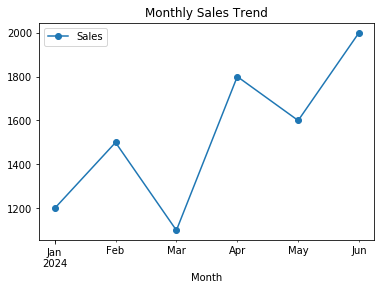

In [ ]:
df9.plot(x="Month", y="Sales", kind="line", marker="o", title="Monthly Sales Trend")
plt.show()

### 柱状图——各地区的销售额对比

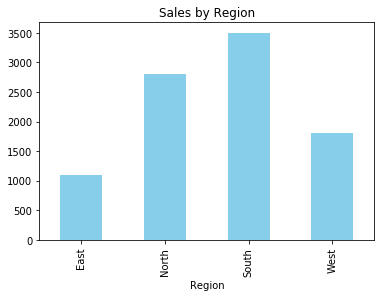

In [ ]:
df9.groupby("Region")["Sales"].sum().plot(kind="bar", title="Sales by Region", color="skyblue")
plt.show()

### 条形图——个产品的利润对比

In [ ]:
df9.groupby("Product")["Profit"].sum().plot(kind="barh", title="Profit by Product", color="orange")
plt.show()

### 饼图——各个地区的销售额占比

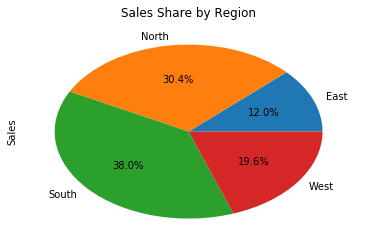

In [ ]:
df9.groupby("Region")["Sales"].sum().plot(
    kind="pie", autopct="%1.1f%%", title="Sales Share by Region"
)
plt.show()

### 直方图——销售额分布

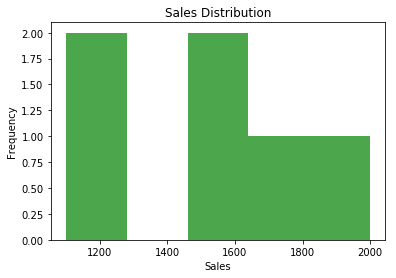

In [ ]:
df9["Sales"].plot(kind="hist", bins=5, title="Sales Distribution", color="green", alpha=0.7)
plt.xlabel("Sales")
plt.show()

### 散点图——销售额和利润之间的关系

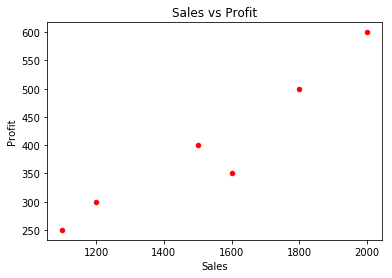

In [ ]:
df9.plot(kind="scatter", x="Sales", y="Profit", title="Sales vs Profit", color="red")
plt.show()

看完了多种多样绘制出来的图片，你是否会感觉到美观度上仍需调整🤔？事实上我们可以对画布进行参数上的调整让它更加美观，你可以自行实验，对图表进行美化操作😊。

| 参数         | 说明                                                                                                                                                             |
| ---------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `kind`     | 指定图表类型，如 `'line'`（折线图，默认）、`'bar'`（柱状图）、`'barh'`（条形图）、`'hist'`（直方图）、`'box'`（箱线图）、`'kde'`（核密度估计）、`'area'`（面积图）、`'pie'`（饼图）、`'scatter'`（散点图，仅Series和DataFrame支持）等 |
| `x`        | 指定作为横坐标的列名（常用于散点图、折线图等）                                                                                                                                        |
| `y`        | 指定作为纵坐标的列名，可以是单列或多列                                                                                                                                            |
| `title`    | 设置图表标题                                                                                                                                                         |
| `color`    | 设置线条或柱子的颜色，可以是字符串（如 `'red'`）或颜色列表                                                                                                                              |
| `style`    | 设置线条样式（如 `'-'` 实线，`'--'` 虚线，`'o'` 点线）                                                                                                                          |
| `alpha`    | 设置透明度（0-1之间的数值，越小越透明）                                                                                                                                          |
| `grid`     | 是否显示网格线（布尔值 `True/False`）                                                                                                                                      |
| `legend`   | 是否显示图例（布尔值，默认 `True`）                                                                                                                                          |
| `figsize`  | 设置图表大小，如 `(10, 6)`                                                                                                                                             |
| `fontsize` | 设置刻度字体大小                                                                                                                                                       |
| `xticks`   | 自定义x轴刻度值                                                                                                                                                       |
| `yticks`   | 自定义y轴刻度值                                                                                                                                                       |
| `xlim`     | 设置x轴显示范围，如 `(0, 100)`                                                                                                                                          |
| `ylim`     | 设置y轴显示范围                                                                                                                                                       |
| `marker`   | 指定标记样式（如 `'o'` 圆点，`'s'` 方块，`'^'` 三角）                                                                                                                           |
| `subplots` | 是否将不同列分别绘制在子图上（布尔值）                                                                                                                                            |
| `sharex`   | 当使用子图时，是否共享x轴                                                                                                                                                  |
| `sharey`   | 当使用子图时，是否共享y轴                                                                                                                                                  |


当然，```matplotlib```能够提供的美化效果是**有限**的，如果有更加高级的需求，可以了解一下[seaborn](https://github.com/mwaskom/seaborn)、[plotly](https://github.com/plotly/plotly.py)、[qgrid](https://github.com/quantopian/qgrid)、[streamlit](https://github.com/streamlit/streamlit)，欢迎同学们自行学习👏